In [12]:
# imports 

from src import sem_functions, city_functions, expert_functions
import importlib

importlib.reload(sem_functions)

from src.sem_functions import *
from src.city_functions import *
from src.expert_functions import *
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import gzip
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<module 'src.sem_functions' from '/Users/katharina/Documents/PhD/Scripts_Paper_1/label-uncertainty-so2sat/src/sem_functions.py'>

In [14]:
# import objects 

with gzip.open('../data/sem_full.pkl', 'rb') as file:
    sem_full = pickle.load(file)

with gzip.open('../data/sem_city.pkl', 'rb') as file:
    sem_city = pickle.load(file)

with gzip.open('../data/sem_experts.pkl', 'rb') as file:
    sem_experts = pickle.load(file)


# import csv 

one_hot_16 = pd.read_csv('../data/one_hot_16.csv').to_numpy()
one_hot_c_16 = pd.read_csv('../data/one_hot_c_16.csv')
votes_16 = pd.read_csv('../data/votes_16.csv').to_numpy()
votes_c = pd.read_csv('../data/votes_c.csv')

## 0. Descriptives 

In [ ]:
# test 

## 1. Classes 

In [15]:
# Extract parameters

pi_full = sem_full[1]
theta_full = sem_full[2]
tau_full = e_step_nozerocorrection(one_hot_16, pi_full, theta_full)

In [16]:
# Confusion probabilities 

np.around(theta_full,3)

array([[0.813, 0.069, 0.   , 0.118, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.957, 0.007, 0.025, 0.008, 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.002, 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.355, 0.514, 0.   , 0.031, 0.098, 0.002, 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.026, 0.023, 0.   , 0.703, 0.246, 0.002, 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.096, 0.007, 0.012, 0.804, 0.079, 0.   , 0.001, 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.001, 0.082, 0.   , 0.007, 0.908, 0.   , 0.001, 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.002, 0.001, 0.   , 0.001, 0.   , 0.972, 0.   , 0.015,
        0.   , 0.   , 0.   , 0.001, 0.009, 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.011, 0.359, 0.007, 0.622, 0.   ,
        0.   , 0.   , 0.  

array([0.002, 0.055, 0.004, 0.01 , 0.065, 0.098, 0.053, 0.011, 0.018,
       0.138, 0.068, 0.012, 0.279, 0.007, 0.005, 0.174])

<BarContainer object of 16 artists>

([<matplotlib.axis.XTick at 0x17e062890>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '8'),
  Text(7, 0, '9'),
  Text(8, 0, '10'),
  Text(9, 0, 'A'),
  Text(10, 0, 'B'),
  Text(11, 0, 'C'),
  Text(12, 0, 'D'),
  Text(13, 0, 'E'),
  Text(14, 0, 'F'),
  Text(15, 0, 'G')])

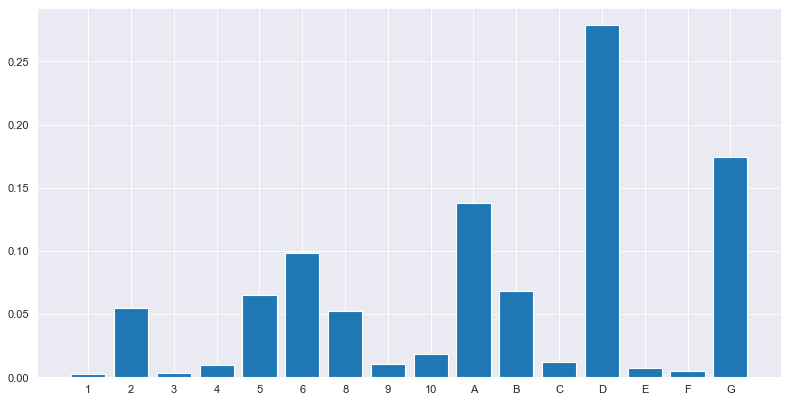

In [17]:
# Prior Probabilities and Votes Proportions 

pi = np.concatenate(pi_full.T)
np.around(pi,3)
labels = [1,2,3,4,5,6,8,9,10,'A','B','C','D','E','F','G']
x = range(16)

f = plt.figure(figsize=(12, 6), dpi=80)
plt.bar(x,pi)
plt.xticks(x, labels)

<BarContainer object of 16 artists>

([<matplotlib.axis.XTick at 0x17f18eb10>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '8'),
  Text(7, 0, '9'),
  Text(8, 0, '10'),
  Text(9, 0, 'A'),
  Text(10, 0, 'B'),
  Text(11, 0, 'C'),
  Text(12, 0, 'D'),
  Text(13, 0, 'E'),
  Text(14, 0, 'F'),
  Text(15, 0, 'G')])

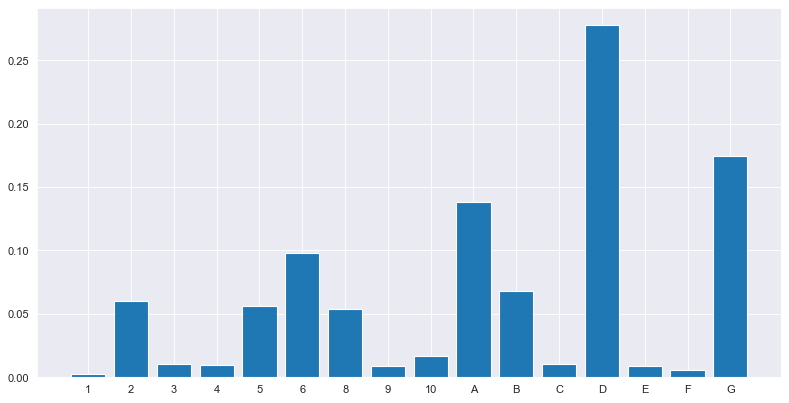

In [18]:
votes_prop = np.sum(one_hot_16,axis=0)/(len(one_hot_16)*12)
f = plt.figure(figsize=(12, 6), dpi=80)
plt.bar(x,votes_prop)
plt.xticks(x, labels)

## 2. Expert Heterogeneity

In [19]:
# create expert-specific dataframes: df_1 -> exclude annotations from expert 1

one_hot_experts = expert_data(votes_16, one_hot_16)

df  0  done.
df  1  done.
df  2  done.
df  3  done.
df  4  done.
df  5  done.
df  6  done.
df  7  done.
df  8  done.
df  9  done.
df  10  done.


In [20]:
# save results to lists

pi_experts=[]
theta_experts=[]
tau_experts_org=[]
tau_experts=[]

j=0
for sem in sem_experts:
    pi_experts.append(sem[1])
    theta_experts.append(sem[2])
    tau_experts_org.append(sem[4])
    tau_experts.append(e_step_nozerocorrection(one_hot_experts[j], sem[1], sem[2]))
    j=j+1

### Test for Homogeneity based on log-LH statistics

In [21]:
# original log-LH for all experts j 

K=16

log_LH_list_org = []

for j in range(11):
    print('expert ', j)
    tau_j = tau_experts[j]
    e_votes = votes_16[range(len(tau_j)),j]

    log_LH_j_i = [np.sum([0 if tau_j[i,k] == 0
                          else 1*np.log(tau_j[i,k]) if e_votes[i]==k
    else 0*np.log(tau_j[i,k]) for k in range(K)]) for i in range(len(e_votes))]

    log_LH_list_org.append(np.sum(log_LH_j_i))

expert  0
expert  1
expert  2
expert  3
expert  4
expert  5
expert  6
expert  7
expert  8
expert  9
expert  10


In [22]:
# bootstrapping images while keeping tau fixed

log_LH_boot_inner_list = []
B = 50

for b in range(B):
    print('bootstrap: ', b)

    N = len(votes_16)
    ind_B_inner = np.random.choice(N, size=N, replace=True)

    log_LH_b_inner = []

    for j in range(11):
        print('expert ', j)
        tau_j = tau_experts[j][ind_B_inner]
        e_votes = votes_16[ind_B_inner,j]

        log_LH_j_i = [np.sum([0 if tau_j[i,k] == 0
                              else 1*np.log(tau_j[i,k]) if e_votes[i]==k
        else 0*np.log(tau_j[i,k]) for k in range(K)]) for i in range(len(e_votes))]

        log_LH_b_inner.append(np.sum(log_LH_j_i))

    log_LH_boot_inner_list.append(log_LH_b_inner)

bootstrap:  0
expert  0
expert  1
expert  2
expert  3
expert  4
expert  5
expert  6
expert  7
expert  8
expert  9
expert  10
bootstrap:  1
expert  0
expert  1
expert  2
expert  3
expert  4
expert  5
expert  6
expert  7
expert  8
expert  9
expert  10
bootstrap:  2
expert  0
expert  1
expert  2
expert  3
expert  4
expert  5
expert  6
expert  7
expert  8
expert  9
expert  10
bootstrap:  3
expert  0
expert  1
expert  2
expert  3
expert  4
expert  5
expert  6
expert  7
expert  8
expert  9
expert  10
bootstrap:  4
expert  0
expert  1
expert  2
expert  3
expert  4
expert  5
expert  6
expert  7
expert  8
expert  9
expert  10
bootstrap:  5
expert  0
expert  1
expert  2
expert  3
expert  4
expert  5
expert  6
expert  7
expert  8
expert  9
expert  10
bootstrap:  6
expert  0
expert  1
expert  2
expert  3
expert  4
expert  5
expert  6
expert  7
expert  8
expert  9
expert  10
bootstrap:  7
expert  0
expert  1
expert  2
expert  3
expert  4
expert  5
expert  6
expert  7
expert  8
expert  9
expert  10


Text(0.5, 0.95, 'Bootstrapped values per expert')

<BarContainer object of 50 artists>

<BarContainer object of 50 artists>

<BarContainer object of 50 artists>

<BarContainer object of 50 artists>

<BarContainer object of 50 artists>

<BarContainer object of 50 artists>

<BarContainer object of 50 artists>

<BarContainer object of 50 artists>

<BarContainer object of 50 artists>

<BarContainer object of 50 artists>

<BarContainer object of 50 artists>

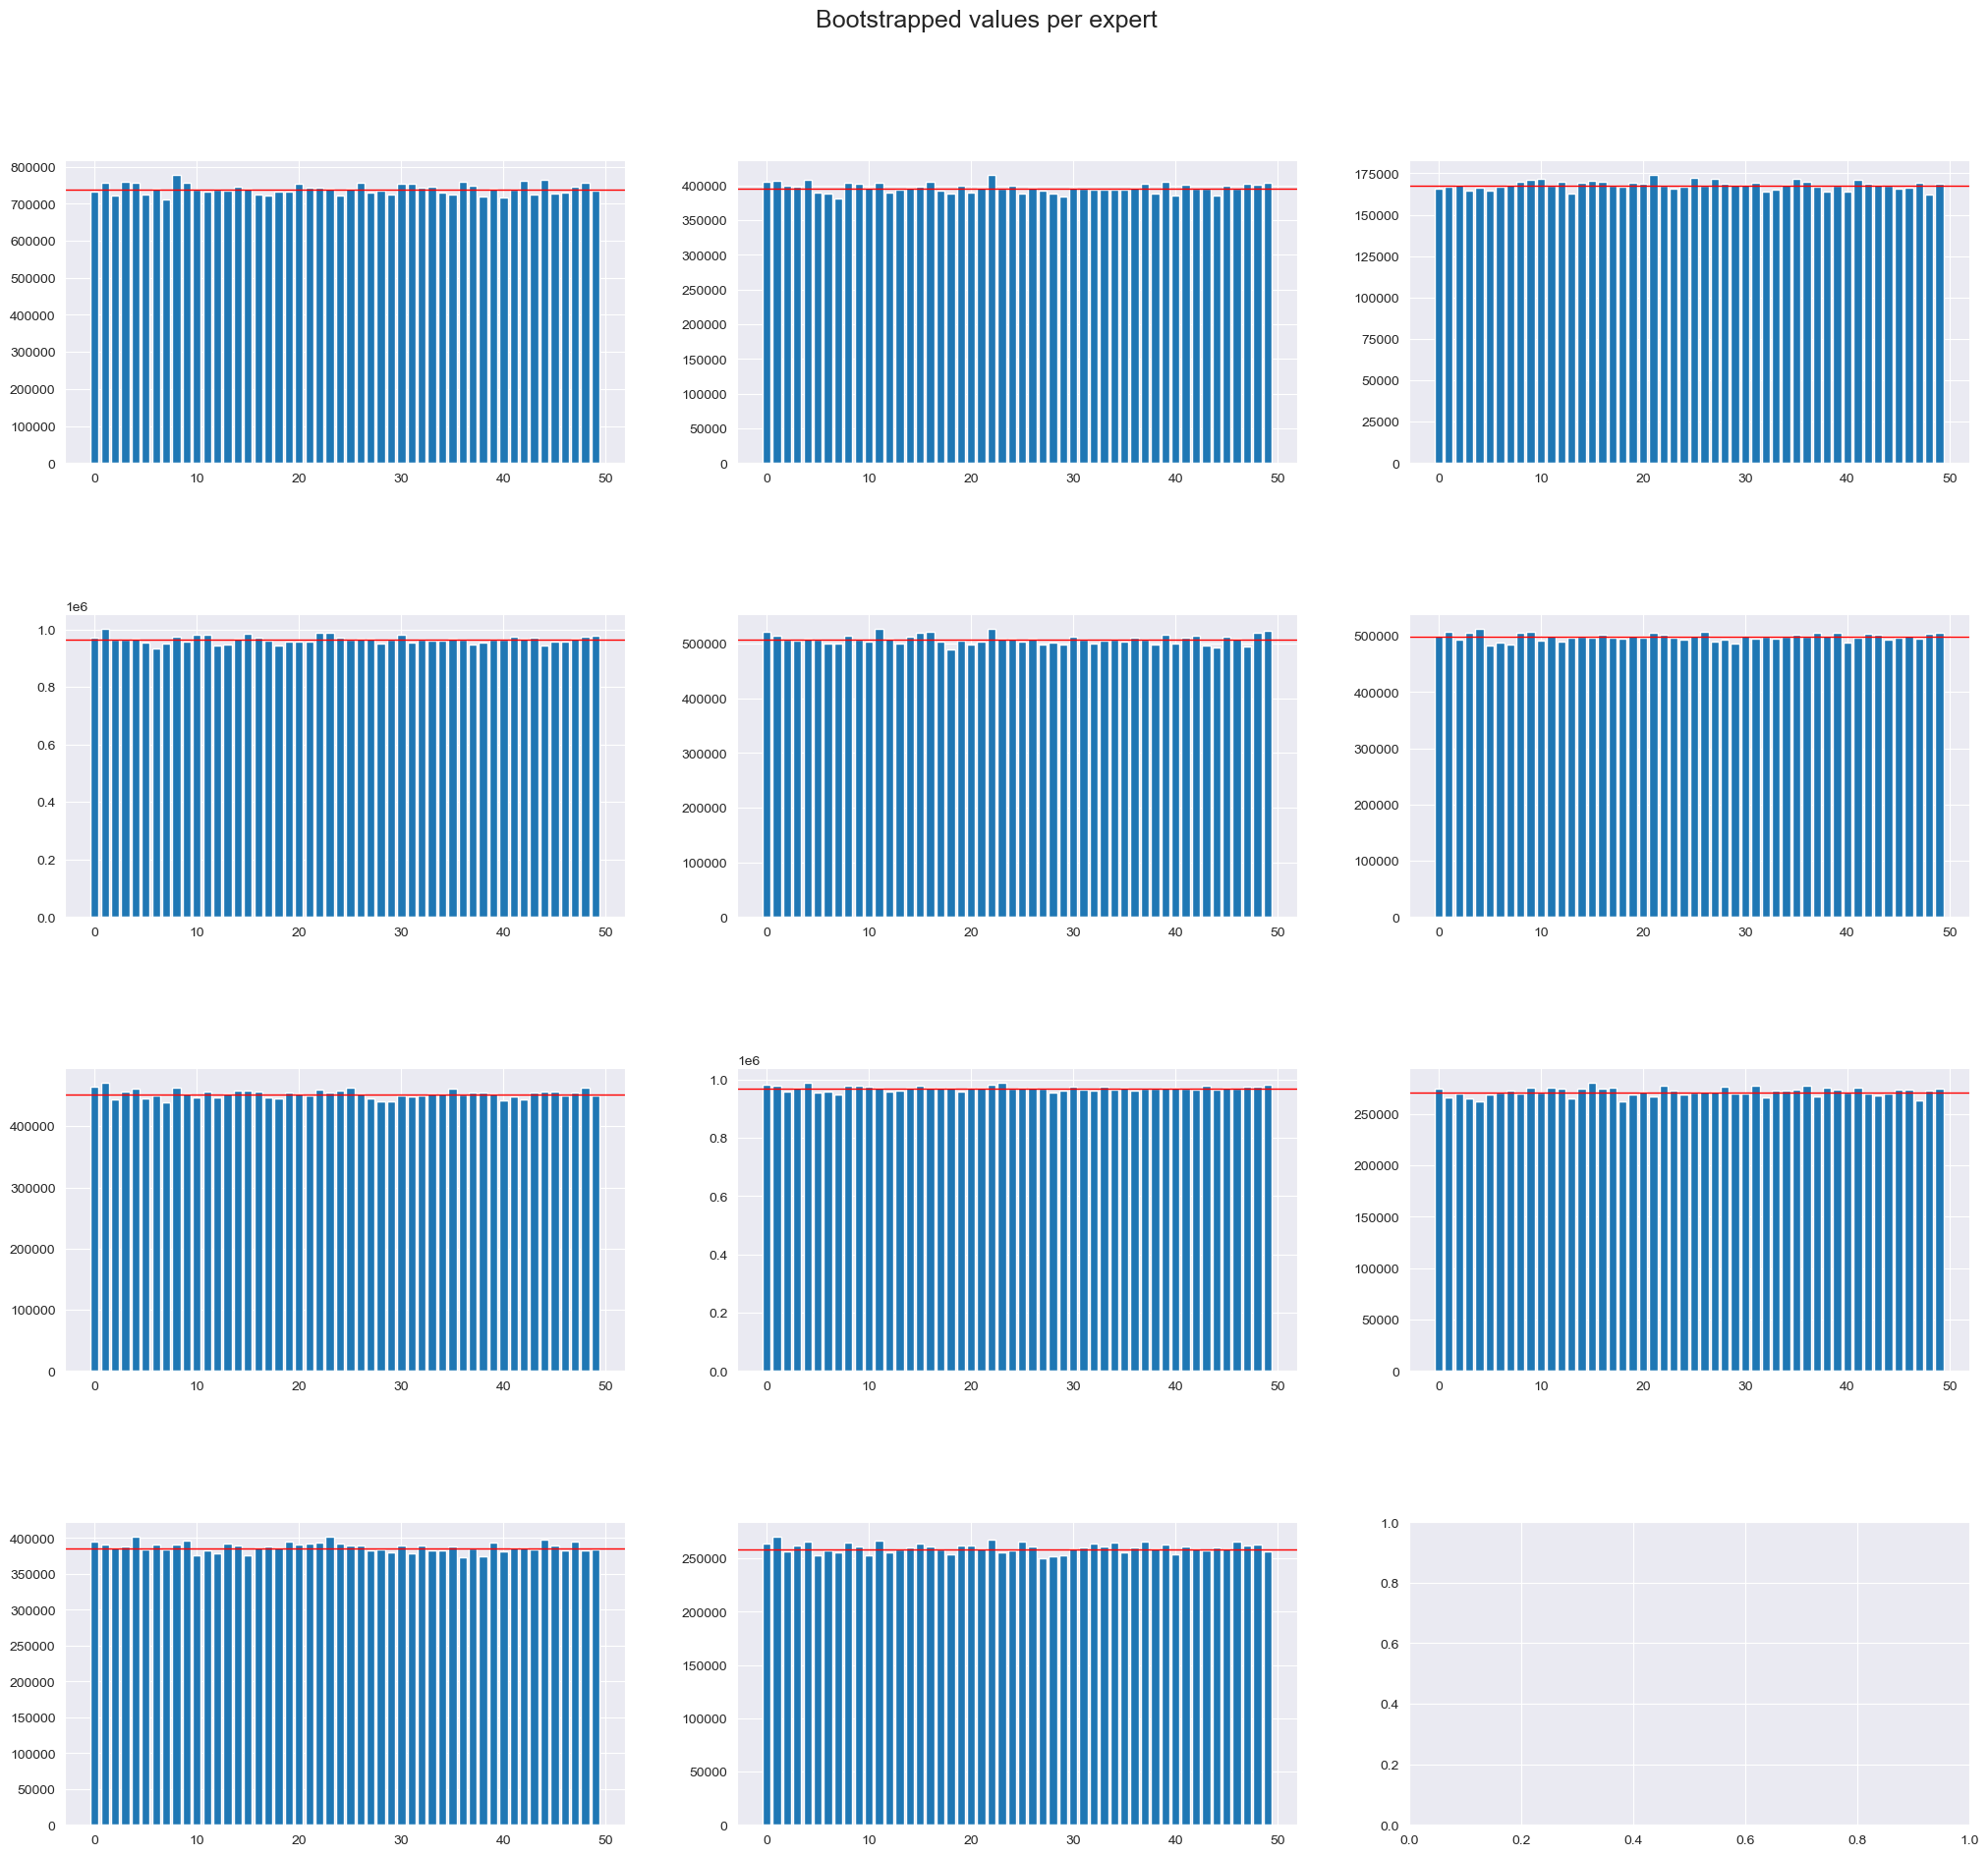

In [23]:
# extract arrays of original and bootstrapped values 

expert_bootstrapped_vals = []

for j in range(11):
    vals = []
    for b in log_LH_boot_inner_list:
        vals.append(-b[j])
    expert_bootstrapped_vals.append(vals)
    
# plot bootstrapped statistic per expert 

# define subplot grid
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(25, 22))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Bootstrapped values per expert", fontsize=18, y=0.95)

for j in range(len(expert_bootstrapped_vals)):
    ax = plt.subplot(4, 3, j + 1)
    x=dict(zip(range(len(log_LH_boot_inner_list)), expert_bootstrapped_vals[j]))

    plt.bar(list(x.keys()), list(x.values()))
    plt.axhline(y = -log_LH_list_org[j],linewidth=1, color='red')

plt.show()

In [24]:
# calculate pairwise differences

d_j_list = []
for j in range(11):
    x_j = -log_LH_list_org[j]
    sum_j = (-np.sum(log_LH_list_org) - x_j)/10
    d_j = np.abs(x_j - sum_j)
    d_j_list.append(d_j)

d_j_list_bootstrapped = []
for log_LH in log_LH_boot_inner_list:

    d_j_list_b = []
    for j in range(11):
        x_j_b = -log_LH[j]
        sum_j_b = (-np.sum(log_LH) - x_j_b)/10
        d_j_b = np.abs(x_j_b - sum_j_b)
        d_j_list_b.append(d_j_b)

    d_j_list_bootstrapped.append(d_j_list_b)

# extract arrays of original and bootstrapped distances

expert_bootstrapped_distances = []

for j in range(11):
    d_vals = []
    for d in d_j_list_bootstrapped:
        d_vals.append(d[j])
    expert_bootstrapped_distances.append(d_vals)

<Figure size 960x640 with 0 Axes>

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

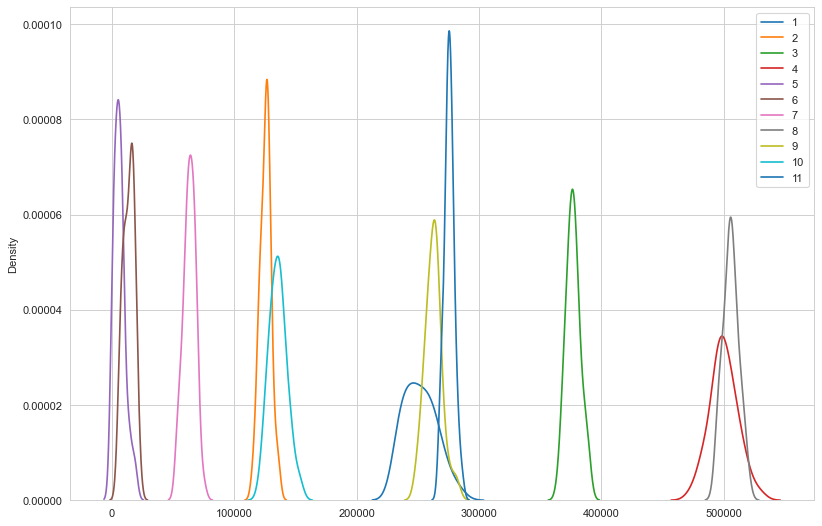

In [25]:
# plot densities for distances

from matplotlib.pyplot import figure
figure(figsize=(12, 8), dpi=80)
for j in range(len(expert_bootstrapped_distances)):
    sns.set_style('whitegrid')
    sns.kdeplot(np.array(expert_bootstrapped_distances[j]), bw=0.5,label=j+1)
plt.legend()
plt.show()

### Random permutation of votings -> Is annotator-effect real?

In [26]:
# bootstrapping images while keeping tau fixed

log_LH_boot_inner_list_random_votes = []

for b in range(B):
    print('bootstrap: ', b)

    N = len(votes_16)
    ind_B_inner = np.random.choice(N, size=N, replace=True)

    log_LH_b_inner = []

    for j in range(11):
        print('expert ', j)

        j_random = np.random.choice(11, size=1, replace=True)

        tau_j = tau_experts[j][ind_B_inner]
        e_votes = votes_16[ind_B_inner,j_random]

        log_LH_j_i = [np.sum([0 if tau_j[i,k] == 0
                              else 1*np.log(tau_j[i,k]) if e_votes[i]==k
        else 0*np.log(tau_j[i,k]) for k in range(K)]) for i in range(len(e_votes))]

        log_LH_b_inner.append(np.sum(log_LH_j_i))

    log_LH_boot_inner_list_random_votes.append(log_LH_b_inner)

bootstrap:  0
expert  0
expert  1
expert  2
expert  3
expert  4
expert  5
expert  6
expert  7
expert  8
expert  9
expert  10
bootstrap:  1
expert  0
expert  1
expert  2
expert  3
expert  4
expert  5
expert  6
expert  7
expert  8
expert  9
expert  10
bootstrap:  2
expert  0
expert  1
expert  2
expert  3
expert  4
expert  5
expert  6
expert  7
expert  8
expert  9
expert  10
bootstrap:  3
expert  0
expert  1
expert  2
expert  3
expert  4
expert  5
expert  6
expert  7
expert  8
expert  9
expert  10
bootstrap:  4
expert  0
expert  1
expert  2
expert  3
expert  4
expert  5
expert  6
expert  7
expert  8
expert  9
expert  10
bootstrap:  5
expert  0
expert  1
expert  2
expert  3
expert  4
expert  5
expert  6
expert  7
expert  8
expert  9
expert  10
bootstrap:  6
expert  0
expert  1
expert  2
expert  3
expert  4
expert  5
expert  6
expert  7
expert  8
expert  9
expert  10
bootstrap:  7
expert  0
expert  1
expert  2
expert  3
expert  4
expert  5
expert  6
expert  7
expert  8
expert  9
expert  10


In [27]:
# extract arrays of original and bootstrapped values 

expert_bootstrapped_vals_rv = []

for j in range(11):
    vals = []
    for b in log_LH_boot_inner_list_random_votes:
        vals.append(-b[j])
    expert_bootstrapped_vals_rv.append(vals)

Text(0.5, 0.95, 'Bootstrapped values per expert (random votes)')

<BarContainer object of 50 artists>

<BarContainer object of 50 artists>

<BarContainer object of 50 artists>

<BarContainer object of 50 artists>

<BarContainer object of 50 artists>

<BarContainer object of 50 artists>

<BarContainer object of 50 artists>

<BarContainer object of 50 artists>

<BarContainer object of 50 artists>

<BarContainer object of 50 artists>

<BarContainer object of 50 artists>

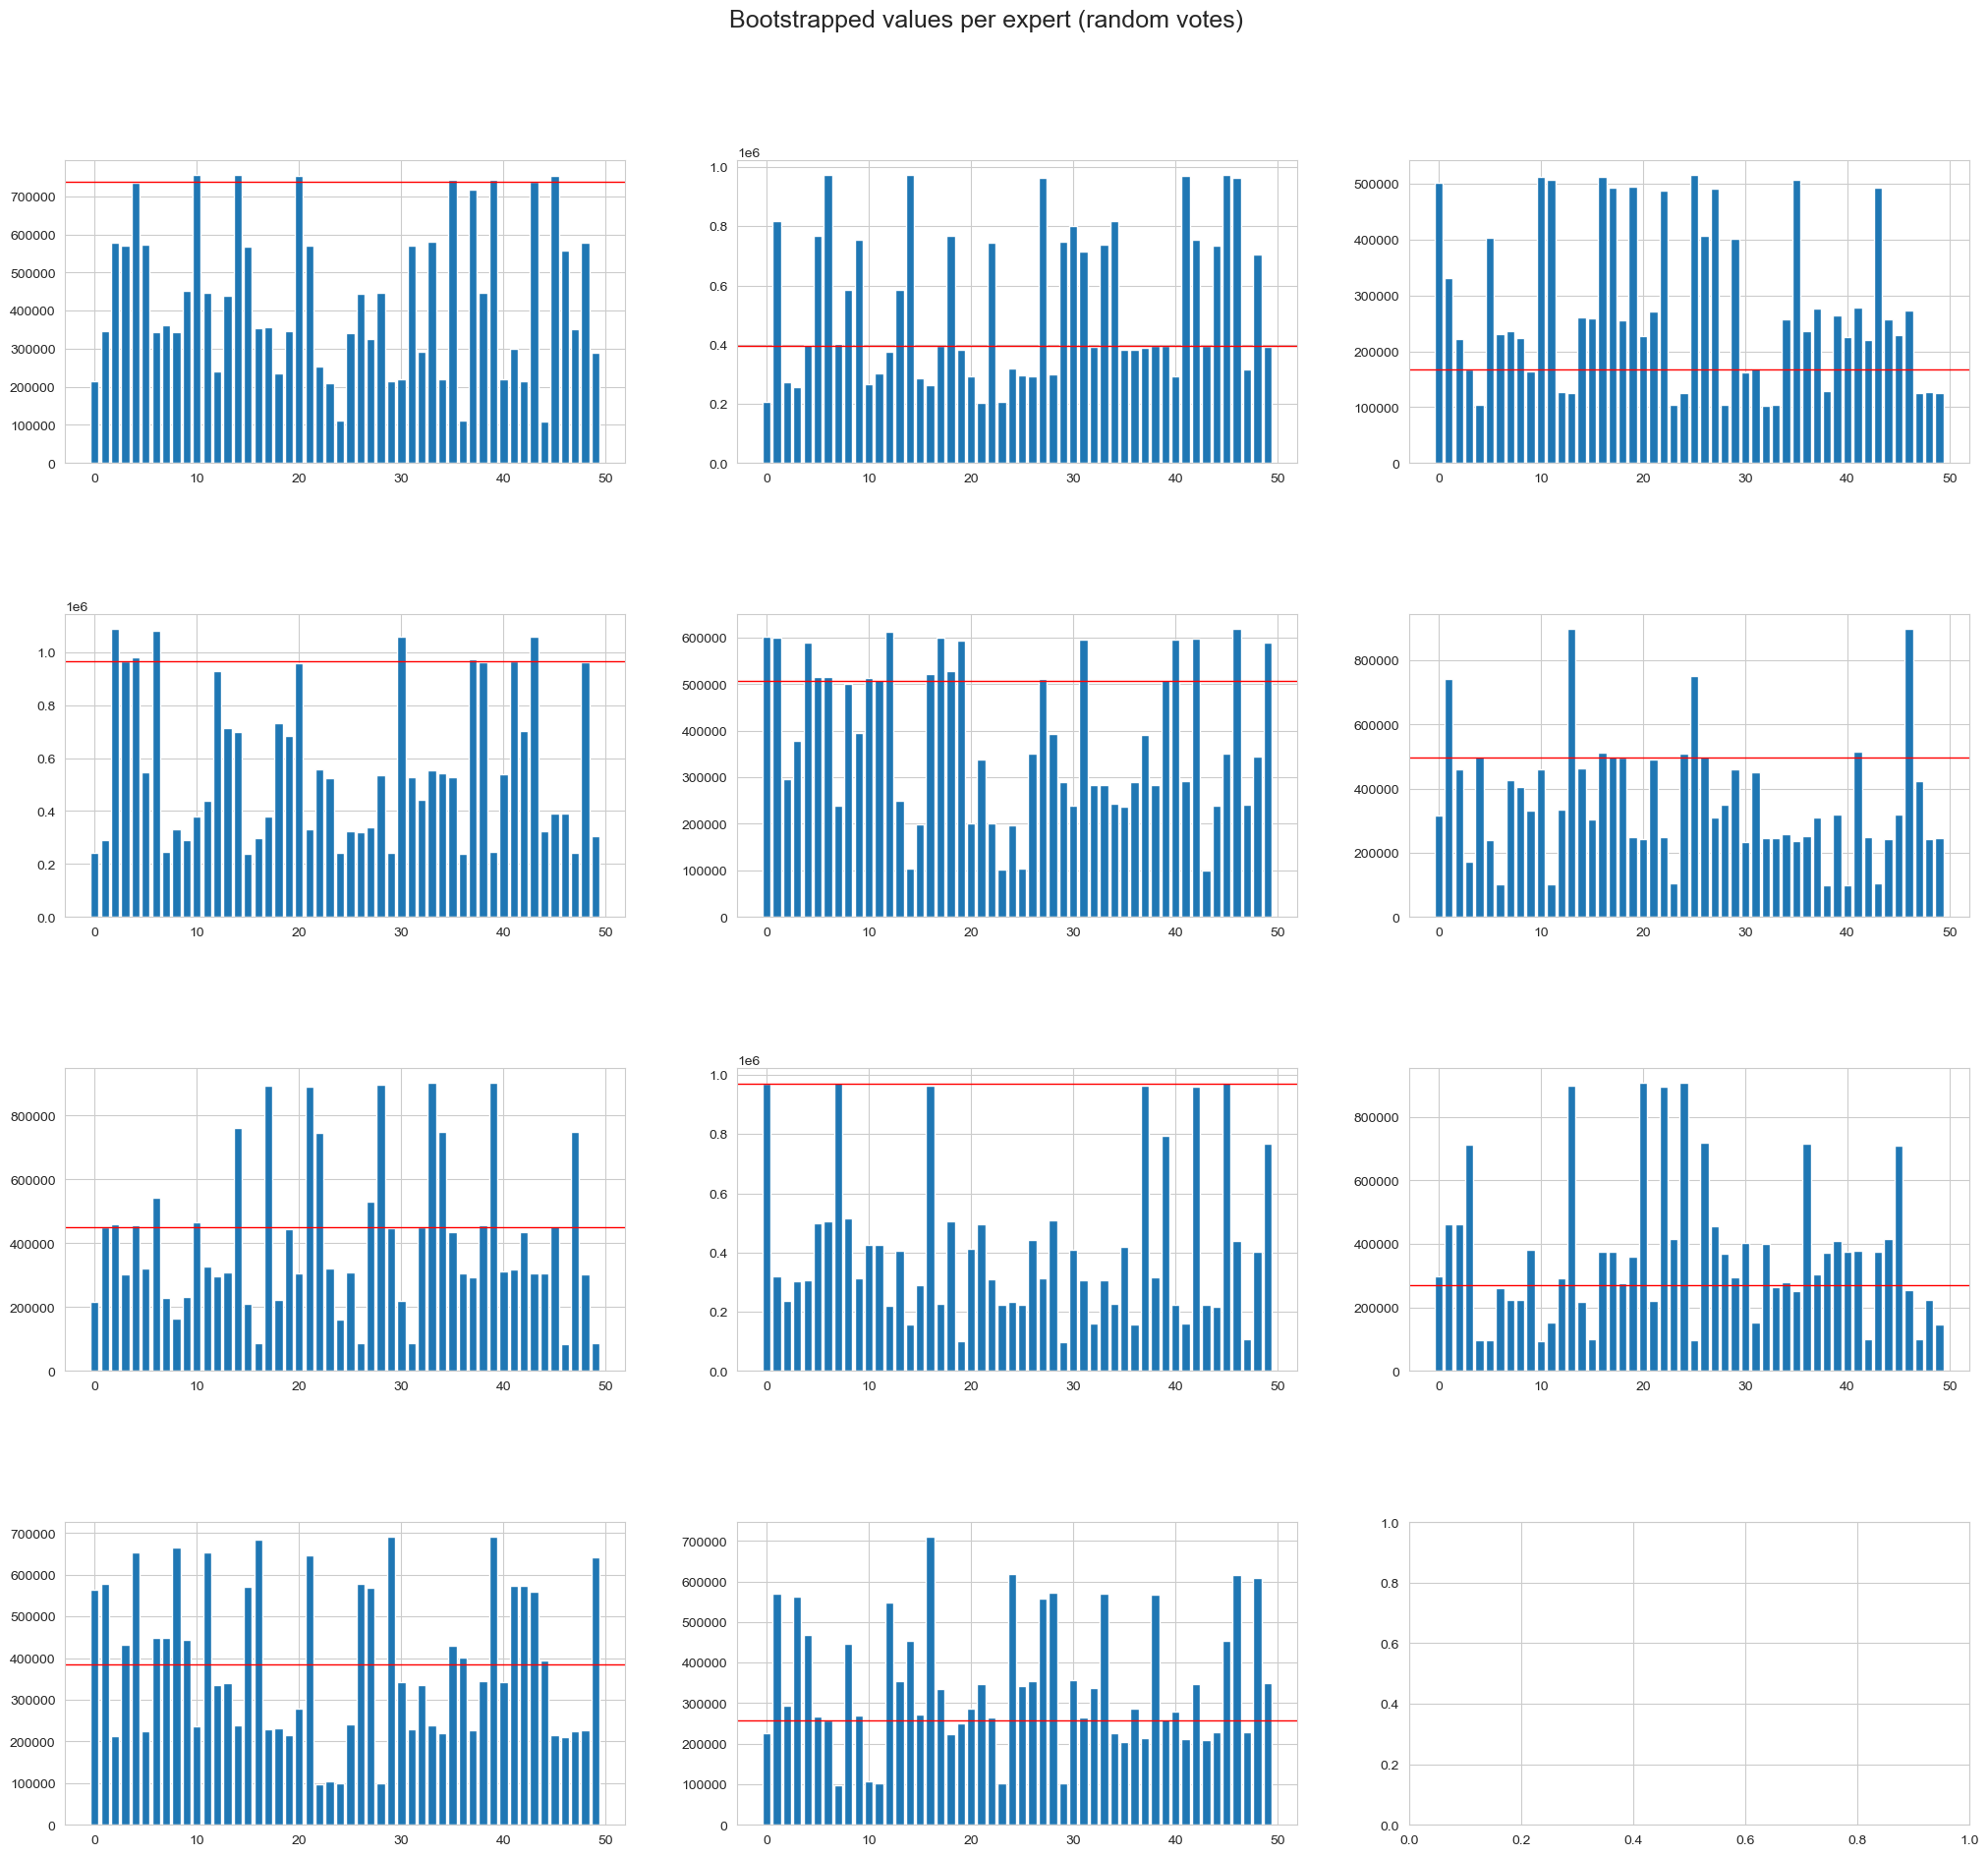

In [28]:
# define subplot grid
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(25, 22))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Bootstrapped values per expert (random votes)", fontsize=18, y=0.95)

for j in range(len(expert_bootstrapped_vals_rv)):
    ax = plt.subplot(4, 3, j + 1)
    x=dict(zip(range(len(log_LH_boot_inner_list_random_votes)), expert_bootstrapped_vals_rv[j]))

    plt.bar(list(x.keys()), list(x.values()))
    plt.axhline(y = -log_LH_list_org[j],linewidth=1, color='red')

plt.show()

In [29]:
# look at pairwise differences 

d_j_list = []
for j in range(11):
    x_j = -log_LH_list_org[j]
    sum_j = (-np.sum(log_LH_list_org) - x_j)/10
    d_j = np.abs(x_j - sum_j)
    d_j_list.append(d_j)

d_j_list_bootstrapped_rv = []
for log_LH in log_LH_boot_inner_list_random_votes:

    d_j_list_b = []
    for j in range(11):
        x_j_b = -log_LH[j]
        sum_j_b = (-np.sum(log_LH) - x_j_b)/10
        d_j_b = np.abs(x_j_b - sum_j_b)
        d_j_list_b.append(d_j_b)

    d_j_list_bootstrapped_rv.append(d_j_list_b)

# extract arrays of original and bootstrapped values 

expert_bootstrapped_distances_rv = []

for j in range(11):
    d_vals = []
    for d in d_j_list_bootstrapped_rv:
        d_vals.append(d[j])
    expert_bootstrapped_distances_rv.append(d_vals)
    

<Figure size 960x640 with 0 Axes>

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

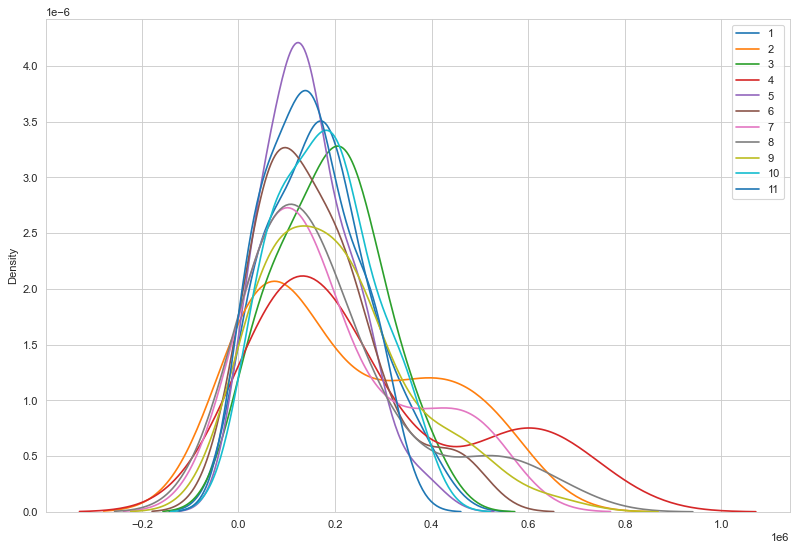

In [30]:
from matplotlib.pyplot import figure
figure(figsize=(12, 8), dpi=80)
for j in range(len(expert_bootstrapped_distances_rv)):
    sns.set_style('whitegrid')
    sns.kdeplot(np.array(expert_bootstrapped_distances_rv[j]), bw=0.5,label=j+1)
plt.legend()
plt.show()

### Split by city 

In [31]:
# define index sets 

ind_7 = np.where(votes_c==7)[0]
city_list = ['berlin', 'cologne', 'london', 'madrid',
             'milan', 'munich', 'paris', 'rome', 'zurich']

df_votes_c_16 = pd.DataFrame(votes_16)
df_votes_c_16['City'] = np.delete(np.array(votes_c['City']), ind_7, axis=0)

In [32]:
city_16_list = []
city_index_list = []

for city in np.unique(df_votes_c_16['City']):
    city_data = df_votes_c_16.loc[df_votes_c_16['City'] == city]
    city_index = df_votes_c_16.index[df_votes_c_16['City'] == city].tolist()
    city_16_list.append(np.array(city_data.drop(columns=['City'])))
    city_index_list.append(city_index)

np.unique(df_votes_c_16['City'],return_counts=True)

(array(['berlin', 'cologne', 'london', 'madrid', 'milan', 'munich',
        'paris', 'rome', 'zurich'], dtype=object),
 array([23970, 22564, 43257, 18610,  3901, 15092, 19672,  6114,  6269]))

In [33]:
# repeat process for all cities separately 

log_LH_list_city_all = []
log_LH_boot_inner_city_all = []
expert_bootstrapped_vals_city_all = []
d_j_list_city_all = []
d_j_list_bootstrapped_city_all = []
expert_bootstrapped_distances_city_all = []


B=20

for c in range(len(city_list)):
    print('City: ', city_list[c])

    # original stats 
    index_city = city_index_list[c]
    log_LH_list_city = []

    for j in range(11):
        print('expert ', j)
        tau_j = tau_experts[j][index_city]
        e_votes = votes_16[index_city,j]

        log_LH_j_i = [np.sum([0 if tau_j[i,k] == 0
                              else 1*np.log(tau_j[i,k]) if e_votes[i]==k
        else 0*np.log(tau_j[i,k]) for k in range(K)]) for i in range(len(e_votes))]

        log_LH_list_city.append(np.sum(log_LH_j_i))

    log_LH_list_city_all.append(log_LH_list_city)

    # bootstrapping images while keeping tau fixed

    log_LH_boot_inner_city = []

    for b in range(B):
        print('bootstrap: ', b)

        ind_B_inner = np.random.choice(index_city, len(index_city))

        log_LH_b_inner = []

        for j in range(11):
            print('expert ', j)
            tau_j = tau_experts[j][ind_B_inner]
            e_votes = votes_16[ind_B_inner,j]

            log_LH_j_i = [np.sum([0 if tau_j[i,k] == 0
                                  else 1*np.log(tau_j[i,k]) if e_votes[i]==k
            else 0*np.log(tau_j[i,k]) for k in range(K)]) for i in range(len(e_votes))]

            log_LH_b_inner.append(np.sum(log_LH_j_i))

        log_LH_boot_inner_city.append(log_LH_b_inner)

    log_LH_boot_inner_city_all.append(log_LH_boot_inner_city)

    # extract arrays of original and bootstrapped values 

    expert_bootstrapped_vals_city = []

    for j in range(11):
        vals = []
        for b in log_LH_boot_inner_city:
            vals.append(-b[j])
        expert_bootstrapped_vals_city.append(vals)

    expert_bootstrapped_vals_city_all.append(expert_bootstrapped_vals_city)

    # look at pairwise differences 

    d_j_list_city = []
    for j in range(11):
        x_j = -log_LH_list_city[j]
        sum_j = (-np.sum(log_LH_list_city) - x_j)/10
        d_j = np.abs(x_j - sum_j)
        d_j_list_city.append(d_j)

    d_j_list_city_all.append(d_j_list_city)

    d_j_list_bootstrapped_city = []
    for log_LH in log_LH_boot_inner_city:

        d_j_list_b = []
        for j in range(11):
            x_j_b = -log_LH[j]
            sum_j_b = (-np.sum(log_LH) - x_j_b)/10
            d_j_b = np.abs(x_j_b - sum_j_b)
            d_j_list_b.append(d_j_b)

        d_j_list_bootstrapped_city.append(d_j_list_b)

    d_j_list_bootstrapped_city_all.append(d_j_list_bootstrapped_city)

    # extract arrays of original and bootstrapped values 

    expert_bootstrapped_distances_city = []

    for j in range(11):
        d_vals = []
        for d in d_j_list_bootstrapped_city:
            d_vals.append(d[j])
        expert_bootstrapped_distances_city.append(d_vals)

    expert_bootstrapped_distances_city_all.append(expert_bootstrapped_distances_city)

City:  berlin
expert  0
expert  1
expert  2
expert  3
expert  4
expert  5
expert  6
expert  7
expert  8
expert  9
expert  10
bootstrap:  0
expert  0
expert  1
expert  2
expert  3
expert  4
expert  5
expert  6
expert  7
expert  8
expert  9
expert  10
bootstrap:  1
expert  0
expert  1
expert  2
expert  3
expert  4
expert  5
expert  6
expert  7
expert  8
expert  9
expert  10
bootstrap:  2
expert  0
expert  1
expert  2
expert  3
expert  4
expert  5
expert  6
expert  7
expert  8
expert  9
expert  10
bootstrap:  3
expert  0
expert  1
expert  2
expert  3
expert  4
expert  5
expert  6
expert  7
expert  8
expert  9
expert  10
bootstrap:  4
expert  0
expert  1
expert  2
expert  3
expert  4
expert  5
expert  6
expert  7
expert  8
expert  9
expert  10
bootstrap:  5
expert  0
expert  1
expert  2
expert  3
expert  4
expert  5
expert  6
expert  7
expert  8
expert  9
expert  10
bootstrap:  6
expert  0
expert  1
expert  2
expert  3
expert  4
expert  5
expert  6
expert  7
expert  8
expert  9
expert  10


Text(0.5, 0.95, 'Density of Differences per Expert for each city')

Text(0.5, 1.0, 'berlin')

<Axes: title={'center': 'berlin'}, ylabel='Density'>

Text(0.5, 1.0, 'berlin')

<Axes: title={'center': 'berlin'}, ylabel='Density'>

Text(0.5, 1.0, 'berlin')

<Axes: title={'center': 'berlin'}, ylabel='Density'>

Text(0.5, 1.0, 'berlin')

<Axes: title={'center': 'berlin'}, ylabel='Density'>

Text(0.5, 1.0, 'berlin')

<Axes: title={'center': 'berlin'}, ylabel='Density'>

Text(0.5, 1.0, 'berlin')

<Axes: title={'center': 'berlin'}, ylabel='Density'>

Text(0.5, 1.0, 'berlin')

<Axes: title={'center': 'berlin'}, ylabel='Density'>

Text(0.5, 1.0, 'berlin')

<Axes: title={'center': 'berlin'}, ylabel='Density'>

Text(0.5, 1.0, 'berlin')

<Axes: title={'center': 'berlin'}, ylabel='Density'>

Text(0.5, 1.0, 'berlin')

<Axes: title={'center': 'berlin'}, ylabel='Density'>

Text(0.5, 1.0, 'berlin')

<Axes: title={'center': 'berlin'}, ylabel='Density'>

Text(0.5, 1.0, 'cologne')

<Axes: title={'center': 'cologne'}, ylabel='Density'>

Text(0.5, 1.0, 'cologne')

<Axes: title={'center': 'cologne'}, ylabel='Density'>

Text(0.5, 1.0, 'cologne')

<Axes: title={'center': 'cologne'}, ylabel='Density'>

Text(0.5, 1.0, 'cologne')

<Axes: title={'center': 'cologne'}, ylabel='Density'>

Text(0.5, 1.0, 'cologne')

<Axes: title={'center': 'cologne'}, ylabel='Density'>

Text(0.5, 1.0, 'cologne')

<Axes: title={'center': 'cologne'}, ylabel='Density'>

Text(0.5, 1.0, 'cologne')

<Axes: title={'center': 'cologne'}, ylabel='Density'>

Text(0.5, 1.0, 'cologne')

<Axes: title={'center': 'cologne'}, ylabel='Density'>

Text(0.5, 1.0, 'cologne')

<Axes: title={'center': 'cologne'}, ylabel='Density'>

Text(0.5, 1.0, 'cologne')

<Axes: title={'center': 'cologne'}, ylabel='Density'>

Text(0.5, 1.0, 'cologne')

<Axes: title={'center': 'cologne'}, ylabel='Density'>

Text(0.5, 1.0, 'london')

<Axes: title={'center': 'london'}, ylabel='Density'>

Text(0.5, 1.0, 'london')

<Axes: title={'center': 'london'}, ylabel='Density'>

Text(0.5, 1.0, 'london')

<Axes: title={'center': 'london'}, ylabel='Density'>

Text(0.5, 1.0, 'london')

<Axes: title={'center': 'london'}, ylabel='Density'>

Text(0.5, 1.0, 'london')

<Axes: title={'center': 'london'}, ylabel='Density'>

Text(0.5, 1.0, 'london')

<Axes: title={'center': 'london'}, ylabel='Density'>

Text(0.5, 1.0, 'london')

<Axes: title={'center': 'london'}, ylabel='Density'>

Text(0.5, 1.0, 'london')

<Axes: title={'center': 'london'}, ylabel='Density'>

Text(0.5, 1.0, 'london')

<Axes: title={'center': 'london'}, ylabel='Density'>

Text(0.5, 1.0, 'london')

<Axes: title={'center': 'london'}, ylabel='Density'>

Text(0.5, 1.0, 'london')

<Axes: title={'center': 'london'}, ylabel='Density'>

Text(0.5, 1.0, 'madrid')

<Axes: title={'center': 'madrid'}, ylabel='Density'>

Text(0.5, 1.0, 'madrid')

<Axes: title={'center': 'madrid'}, ylabel='Density'>

Text(0.5, 1.0, 'madrid')

<Axes: title={'center': 'madrid'}, ylabel='Density'>

Text(0.5, 1.0, 'madrid')

<Axes: title={'center': 'madrid'}, ylabel='Density'>

Text(0.5, 1.0, 'madrid')

<Axes: title={'center': 'madrid'}, ylabel='Density'>

Text(0.5, 1.0, 'madrid')

<Axes: title={'center': 'madrid'}, ylabel='Density'>

Text(0.5, 1.0, 'madrid')

<Axes: title={'center': 'madrid'}, ylabel='Density'>

Text(0.5, 1.0, 'madrid')

<Axes: title={'center': 'madrid'}, ylabel='Density'>

Text(0.5, 1.0, 'madrid')

<Axes: title={'center': 'madrid'}, ylabel='Density'>

Text(0.5, 1.0, 'madrid')

<Axes: title={'center': 'madrid'}, ylabel='Density'>

Text(0.5, 1.0, 'madrid')

<Axes: title={'center': 'madrid'}, ylabel='Density'>

Text(0.5, 1.0, 'milan')

<Axes: title={'center': 'milan'}, ylabel='Density'>

Text(0.5, 1.0, 'milan')

<Axes: title={'center': 'milan'}, ylabel='Density'>

Text(0.5, 1.0, 'milan')

<Axes: title={'center': 'milan'}, ylabel='Density'>

Text(0.5, 1.0, 'milan')

<Axes: title={'center': 'milan'}, ylabel='Density'>

Text(0.5, 1.0, 'milan')

<Axes: title={'center': 'milan'}, ylabel='Density'>

Text(0.5, 1.0, 'milan')

<Axes: title={'center': 'milan'}, ylabel='Density'>

Text(0.5, 1.0, 'milan')

<Axes: title={'center': 'milan'}, ylabel='Density'>

Text(0.5, 1.0, 'milan')

<Axes: title={'center': 'milan'}, ylabel='Density'>

Text(0.5, 1.0, 'milan')

<Axes: title={'center': 'milan'}, ylabel='Density'>

Text(0.5, 1.0, 'milan')

<Axes: title={'center': 'milan'}, ylabel='Density'>

Text(0.5, 1.0, 'milan')

<Axes: title={'center': 'milan'}, ylabel='Density'>

Text(0.5, 1.0, 'munich')

<Axes: title={'center': 'munich'}, ylabel='Density'>

Text(0.5, 1.0, 'munich')

<Axes: title={'center': 'munich'}, ylabel='Density'>

Text(0.5, 1.0, 'munich')

<Axes: title={'center': 'munich'}, ylabel='Density'>

Text(0.5, 1.0, 'munich')

<Axes: title={'center': 'munich'}, ylabel='Density'>

Text(0.5, 1.0, 'munich')

<Axes: title={'center': 'munich'}, ylabel='Density'>

Text(0.5, 1.0, 'munich')

<Axes: title={'center': 'munich'}, ylabel='Density'>

Text(0.5, 1.0, 'munich')

<Axes: title={'center': 'munich'}, ylabel='Density'>

Text(0.5, 1.0, 'munich')

<Axes: title={'center': 'munich'}, ylabel='Density'>

Text(0.5, 1.0, 'munich')

<Axes: title={'center': 'munich'}, ylabel='Density'>

Text(0.5, 1.0, 'munich')

<Axes: title={'center': 'munich'}, ylabel='Density'>

Text(0.5, 1.0, 'munich')

<Axes: title={'center': 'munich'}, ylabel='Density'>

Text(0.5, 1.0, 'paris')

<Axes: title={'center': 'paris'}, ylabel='Density'>

Text(0.5, 1.0, 'paris')

<Axes: title={'center': 'paris'}, ylabel='Density'>

Text(0.5, 1.0, 'paris')

<Axes: title={'center': 'paris'}, ylabel='Density'>

Text(0.5, 1.0, 'paris')

<Axes: title={'center': 'paris'}, ylabel='Density'>

Text(0.5, 1.0, 'paris')

<Axes: title={'center': 'paris'}, ylabel='Density'>

Text(0.5, 1.0, 'paris')

<Axes: title={'center': 'paris'}, ylabel='Density'>

Text(0.5, 1.0, 'paris')

<Axes: title={'center': 'paris'}, ylabel='Density'>

Text(0.5, 1.0, 'paris')

<Axes: title={'center': 'paris'}, ylabel='Density'>

Text(0.5, 1.0, 'paris')

<Axes: title={'center': 'paris'}, ylabel='Density'>

Text(0.5, 1.0, 'paris')

<Axes: title={'center': 'paris'}, ylabel='Density'>

Text(0.5, 1.0, 'paris')

<Axes: title={'center': 'paris'}, ylabel='Density'>

Text(0.5, 1.0, 'rome')

<Axes: title={'center': 'rome'}, ylabel='Density'>

Text(0.5, 1.0, 'rome')

<Axes: title={'center': 'rome'}, ylabel='Density'>

Text(0.5, 1.0, 'rome')

<Axes: title={'center': 'rome'}, ylabel='Density'>

Text(0.5, 1.0, 'rome')

<Axes: title={'center': 'rome'}, ylabel='Density'>

Text(0.5, 1.0, 'rome')

<Axes: title={'center': 'rome'}, ylabel='Density'>

Text(0.5, 1.0, 'rome')

<Axes: title={'center': 'rome'}, ylabel='Density'>

Text(0.5, 1.0, 'rome')

<Axes: title={'center': 'rome'}, ylabel='Density'>

Text(0.5, 1.0, 'rome')

<Axes: title={'center': 'rome'}, ylabel='Density'>

Text(0.5, 1.0, 'rome')

<Axes: title={'center': 'rome'}, ylabel='Density'>

Text(0.5, 1.0, 'rome')

<Axes: title={'center': 'rome'}, ylabel='Density'>

Text(0.5, 1.0, 'rome')

<Axes: title={'center': 'rome'}, ylabel='Density'>

Text(0.5, 1.0, 'zurich')

<Axes: title={'center': 'zurich'}, ylabel='Density'>

Text(0.5, 1.0, 'zurich')

<Axes: title={'center': 'zurich'}, ylabel='Density'>

Text(0.5, 1.0, 'zurich')

<Axes: title={'center': 'zurich'}, ylabel='Density'>

Text(0.5, 1.0, 'zurich')

<Axes: title={'center': 'zurich'}, ylabel='Density'>

Text(0.5, 1.0, 'zurich')

<Axes: title={'center': 'zurich'}, ylabel='Density'>

Text(0.5, 1.0, 'zurich')

<Axes: title={'center': 'zurich'}, ylabel='Density'>

Text(0.5, 1.0, 'zurich')

<Axes: title={'center': 'zurich'}, ylabel='Density'>

Text(0.5, 1.0, 'zurich')

<Axes: title={'center': 'zurich'}, ylabel='Density'>

Text(0.5, 1.0, 'zurich')

<Axes: title={'center': 'zurich'}, ylabel='Density'>

Text(0.5, 1.0, 'zurich')

<Axes: title={'center': 'zurich'}, ylabel='Density'>

Text(0.5, 1.0, 'zurich')

<Axes: title={'center': 'zurich'}, ylabel='Density'>

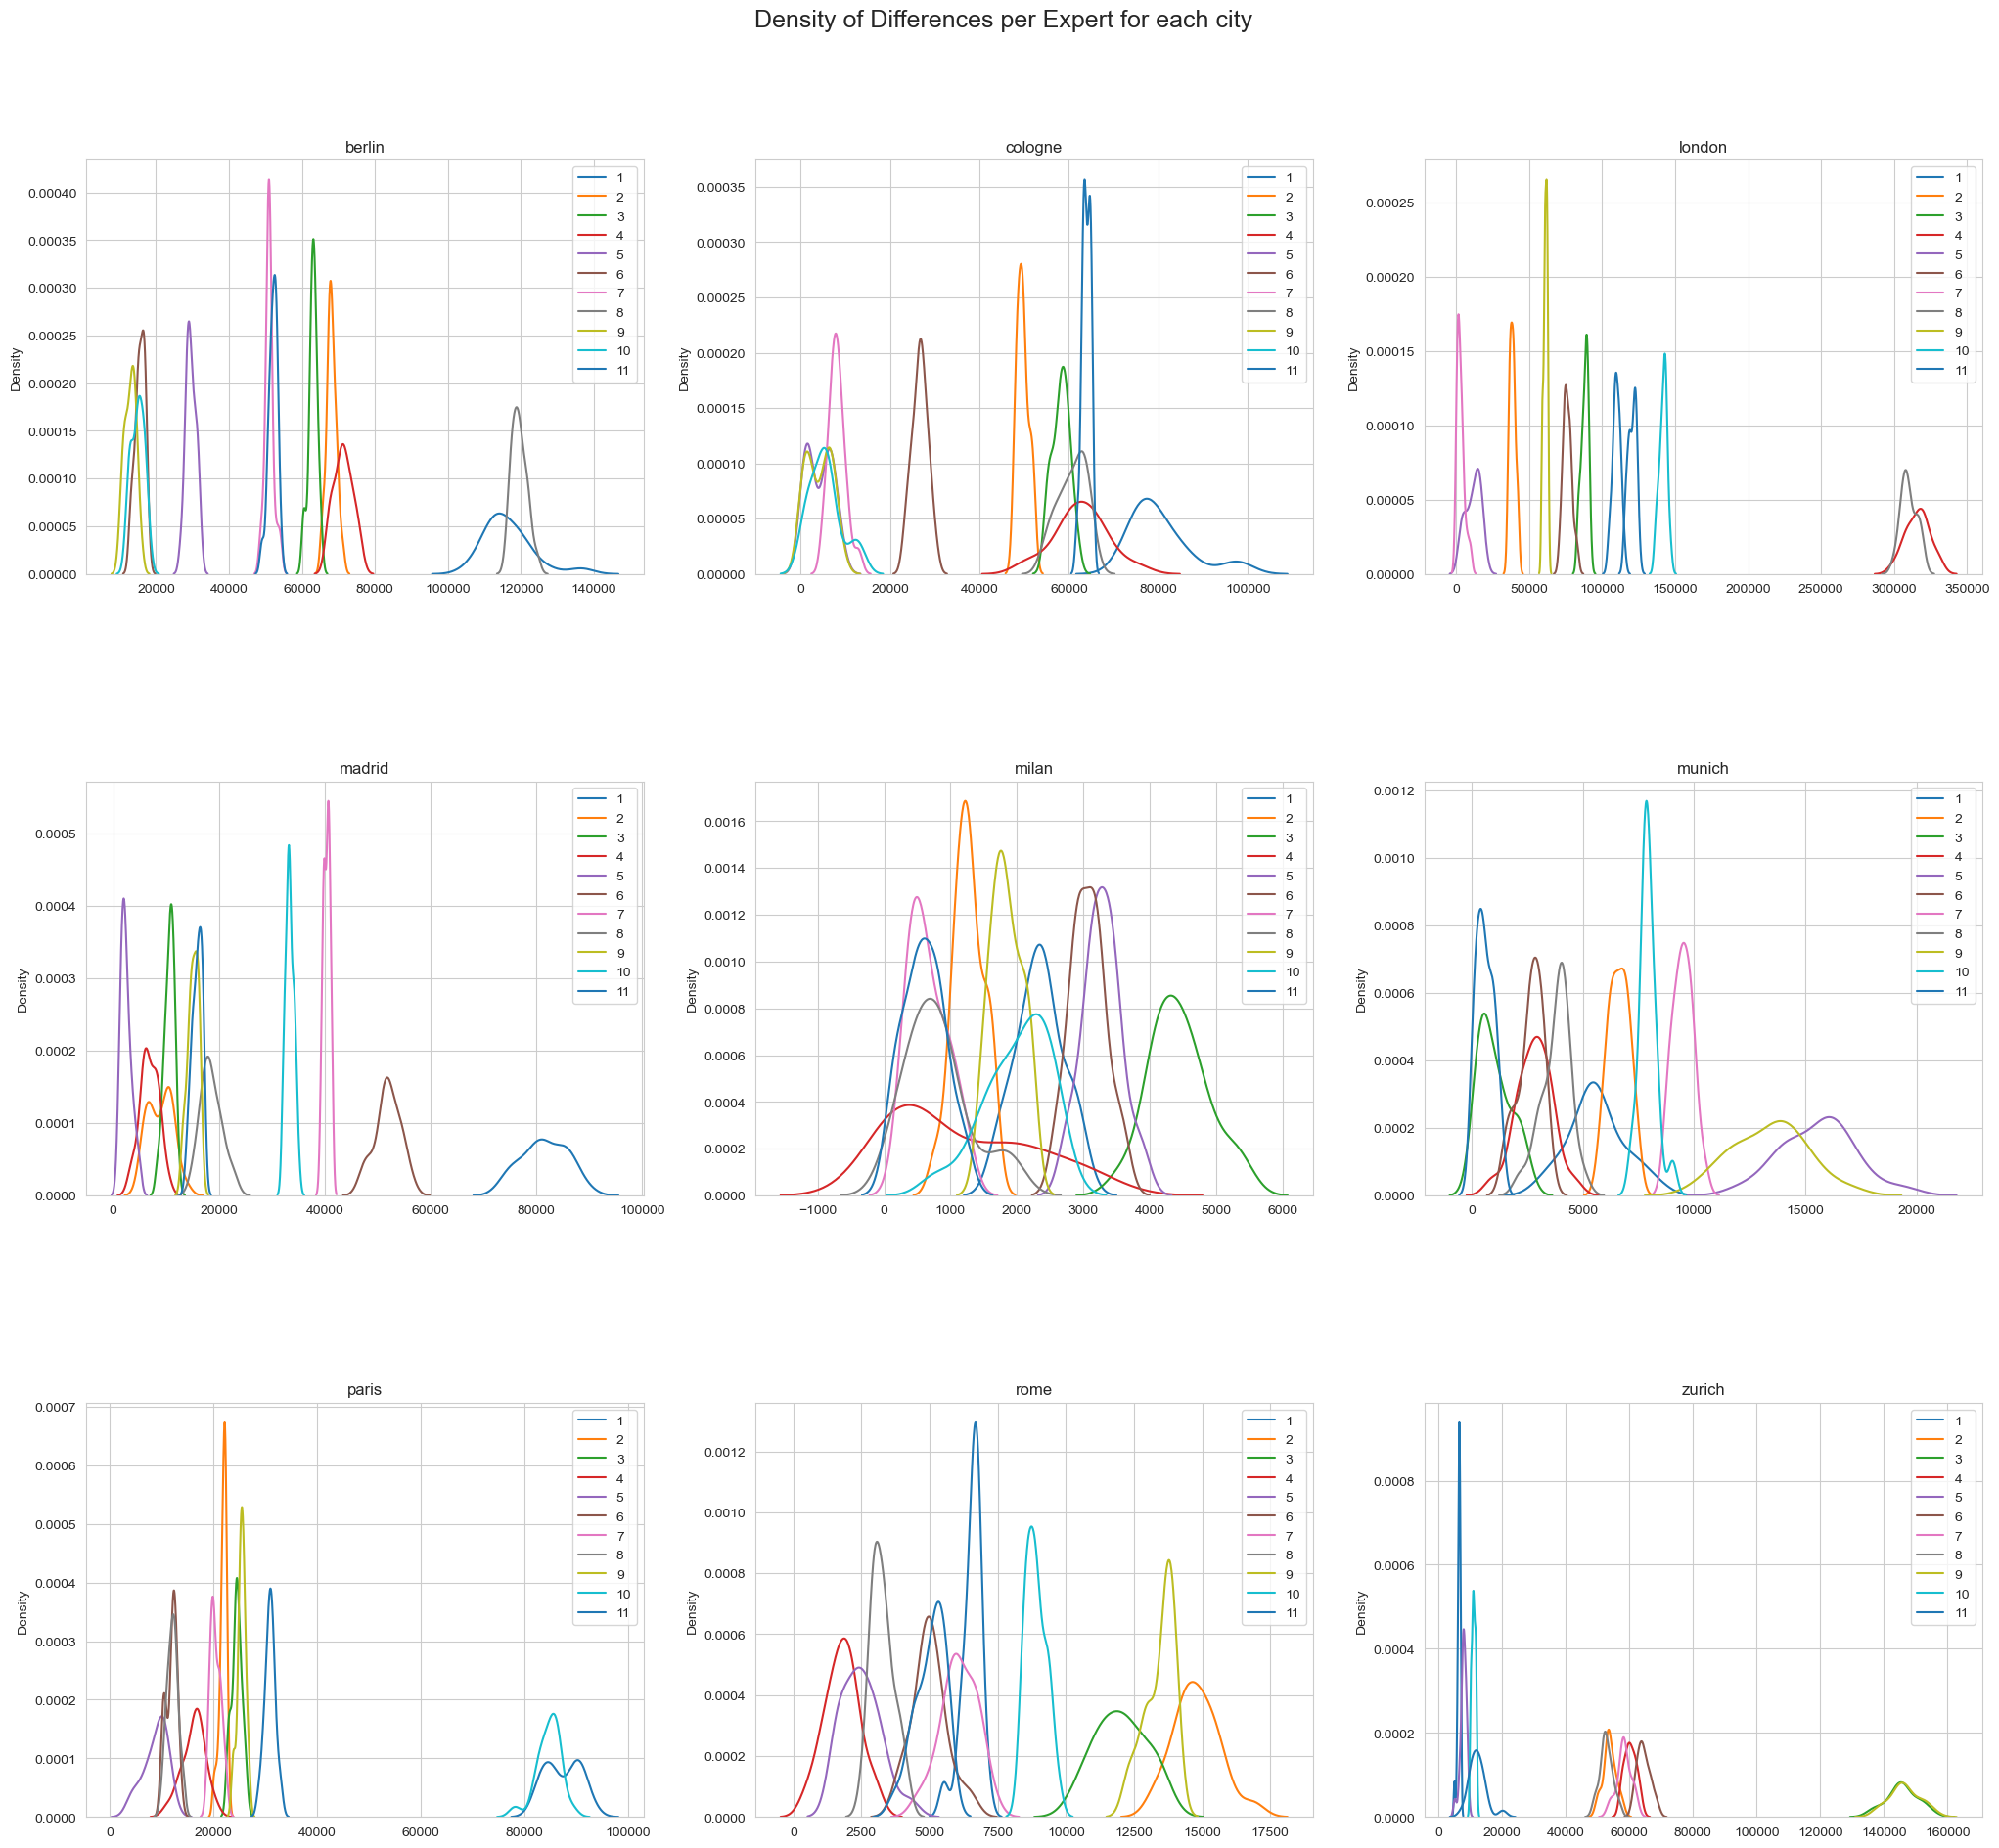

In [34]:
# define subplot grid
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(25, 22))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Density of Differences per Expert for each city", fontsize=18, y=0.95)

for c in range(len(city_list)):
    ax = plt.subplot(3, 3, c + 1)
    for j in range(len(expert_bootstrapped_distances_city_all[c])):
        plt.title(city_list[c])
        sns.set_style('whitegrid')
        sns.kdeplot(np.array(expert_bootstrapped_distances_city_all[c][j]), bw=0.5,label=j+1)
        plt.legend()
plt.show()

## 3. City Differences 

In [35]:
# t-test for differences of cities 

test_cities = theta_comparison_city(city_sem=sem_city, city_list=city_list, K=16)

berlin  vs.  cologne
berlin  vs.  london
berlin  vs.  madrid
berlin  vs.  milan
berlin  vs.  munich
berlin  vs.  paris
berlin  vs.  rome
berlin  vs.  zurich
cologne  vs.  london
cologne  vs.  madrid
cologne  vs.  milan
cologne  vs.  munich
cologne  vs.  paris
cologne  vs.  rome
cologne  vs.  zurich
london  vs.  madrid
london  vs.  milan
london  vs.  munich
london  vs.  paris
london  vs.  rome
london  vs.  zurich
madrid  vs.  milan
madrid  vs.  munich
madrid  vs.  paris
madrid  vs.  rome
madrid  vs.  zurich
milan  vs.  munich
milan  vs.  paris
milan  vs.  rome
milan  vs.  zurich
munich  vs.  paris
munich  vs.  rome
munich  vs.  zurich
paris  vs.  rome
paris  vs.  zurich
rome  vs.  zurich


In [36]:
# confusion matrices for London, Berlin and Munich 

theta_berlin = sem_city[0][3]
theta_munich = sem_city[5][3]
theta_london = sem_city[2][3]

In [37]:
np.around(theta_berlin,3)
np.around(theta_munich,3)
np.around(theta_london,3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.133, 0.244, 0.623, 0.   , 0.   , 0.   ],
       [0.   , 0.987, 0.   , 0.   , 0.002, 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.011, 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.073, 0.   , 0.01 , 0.917, 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.682, 0.318, 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.129, 0.   , 0.027, 0.844, 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.96 , 0.   , 0.033,
        0.   , 0.   , 0.   , 0.   , 0.007, 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.258, 0.027, 0.714, 0.   ,
        0.   , 0.   , 0.  

array([[0.   , 0.01 , 0.   , 0.   , 0.   , 0.   , 0.427, 0.   , 0.396,
        0.   , 0.   , 0.   , 0.   , 0.167, 0.   , 0.   ],
       [0.   , 0.889, 0.087, 0.   , 0.025, 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.312, 0.375, 0.   , 0.125, 0.188, 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.025, 0.083, 0.   , 0.525, 0.367, 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.987, 0.013, 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.021, 0.   , 0.   , 0.974, 0.   , 0.005, 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.007, 0.   , 0.   , 0.   , 0.   , 0.948, 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.045, 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.046, 0.   , 0.954, 0.   ,
        0.   , 0.   , 0.  

array([[0.818, 0.07 , 0.   , 0.112, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.963, 0.   , 0.   , 0.037, 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.207, 0.079, 0.   , 0.383, 0.332, 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.045, 0.172, 0.   , 0.7  , 0.083, 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.21 , 0.007, 0.   , 0.676, 0.106, 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.112, 0.   , 0.   , 0.888, 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.002, 0.   , 0.   , 0.976, 0.   , 0.012,
        0.   , 0.   , 0.   , 0.   , 0.01 , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.167, 0.   , 0.833, 0.   ,
        0.   , 0.   , 0.  